# Loading the Libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm
import matplotlib.colorbar
import matplotlib.colors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.linalg import eigh
from Modules.Visualizers import VisualizePCA, PCA

# Loading Railway Dataset

In [3]:
railway_data = pd.read_csv("data/railwayBookingList.csv")
railway_data = railway_data.dropna()

railway_data.loc[railway_data["sex"] == "male", "sex"] = 1
railway_data.loc[railway_data["sex"] == "female", "sex"] = 0

railway_data.loc[railway_data["preferredClass"] == "FIRST_AC", "preferredClass"] = 0
railway_data.loc[railway_data["preferredClass"] == "SECOND_AC", "preferredClass"] = 1
railway_data.loc[railway_data["preferredClass"] == "THIRD_AC", "preferredClass"] = 2

x = railway_data.drop(["caseID", "boarded"], axis = 1).values
y = railway_data["boarded"].values


#x_ = (x - x.mean(axis = 0)) / np.sqrt(x.var(axis = 0))

# 3D Visualization (Learned Decision Boundaries and Data)

In [4]:
def visualize_medical(num_classes,x_train,y_train,ws):
    for classx in range(0,num_classes):
        print(classx)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = "3d")
        
        
        point = np.array([0,0,0])
        normal = np.array(ws[classx])
        d = -point.dot(normal)
    
    
        x_range = np.arange(-2,2,0.01)
        y_range = np.arange(-2,2,0.01)
        xx, yy = np.meshgrid(x_range, y_range)

        z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
    
        plt3d = plt.figure().gca(projection='3d')
        plt3d.plot_surface(xx, yy, z, alpha=0.2)
        ax = plt.gca()
        #ax.hold(True)

    
        ax.scatter(x_train[:, 0], x_train[:, 1], x_train[:, 2], c = y_==classx, marker = ".")
        #ax.hold(True)
        ax.set_xlabel("TEST1")
        ax.set_ylabel("TEST2")
        ax.set_zlabel("TEST3")
        
        ax.hold(True)

# 2D Visualization (Learned Decision Boundaries and Data)

In [5]:
def visualize_medical_2d(x_train,y_train,ws):
    for i in range(3):
        fig = plt.figure()
        plt.scatter(x_train[:,0],x_train[:,1], s= 0.5, c = y_==i)
        x = np.arange(-1,1,0.01)
        y = -1 * (ws[i][0]/ws[i][1]) * x 
        plt.plot(x,y)
        plt.show()

# Perceptron

In [6]:
def hypo(w,x):
    return np.dot(np.transpose(w),x)

In [7]:
def accuracy(x,y,w,my_label):
    count = 0
    for ix in range(x.shape[0]):
        h = hypo(w,x[ix])
        if(h<0 and y[ix]==my_label) or (h>0 and y[ix]!=my_label):
            count = count + 1
    return (count/x.shape[0]) * 100

# Perceptron Iterative

In [8]:
def train(x,y,w, plot_num,my_label):
    accur = []
    index = np.arange(x.shape[0])
    np.random.shuffle(index)
    print("Initial Accuracy is : " , accuracy(x,y,w,my_label))
    for i in range(index.shape[0]):
        ix = index[i]
        h = hypo(w,x[ix])
        if(h>=0 and y[ix]==my_label):
            w = w - x[ix]
        elif(h<=0 and y[ix]!=my_label):
            w = w + x[ix]
        acc = accuracy(x,y,w,my_label)
        accur.append(acc)
        
    #plt.figure(plot_num)
    #plt.plot(accur[:50])
    #plt.show()
    return w

In [9]:
def perceptron_iterative(x,y,plot_num, my_label):
    w = np.random.rand(x.shape[1])
    w = train(x,y,w,plot_num,my_label)
    return [w,accuracy(x,y,w,my_label)]

# Perceptron with Gradient Descent

In [10]:
def perceptron_gd(x,y,learning_rate,my_label):
        w = np.random.rand(x.shape[1])
        max_iter = 100
        accur = []
        for i in range(max_iter):
            sum = 0
            for ix in range(x.shape[1]):
                h = hypo(w,x[ix])
                if(h>=0 and y[ix]==my_label):
                    sum = sum - x[ix]
                elif(h<=0 and y[ix]!=my_label):
                    sum = sum + x[ix]
                    
            w = w + learning_rate * sum
            accur.append(accuracy(x,y,w,my_label))
        return [w,accur[max_iter-1]]

# Perceptron Iterative On Railway Dataset

In [14]:
ret = perceptron_iterative(x,y,0,my_label = 0)
print("Final Accuracy is : " , ret[1])

Initial Accuracy is :  61.80290297937356
Final Accuracy is :  61.80290297937356


# Loading Medical Dataset

In [17]:
def LoadData(type = "Standardized"):
    medical_data = pd.read_csv("data/Medical_data.csv")
    medical_data_test = pd.read_csv("data/test_medical.csv")

    x = medical_data.drop("Health", axis = 1).values
    y = medical_data["Health"].values
    xt = medical_data_test.drop("Health",axis = 1).values
    yt = medical_data_test["Health"].values

    if(type == "Standardized"):
        train_mu = x.mean(axis = 0)
        train_sigma = np.sqrt(x.var(axis = 0))

        x_ = (x - train_mu) / train_sigma

        x_train = x_
        y_train = y.copy()

        x_test = (xt.copy() - train_mu) / train_sigma
        y_test = yt.copy()
    else:
        x_train = x
        y_train = y

        x_test = xt
        y_test = yt
    
    y_ = y_train.copy()
    y_[y_ == "HEALTHY"] = 0
    y_[y_ == "SURGERY"] = 1
    y_[y_ == "MEDICATION"] = 2

    return medical_data, x_train, y_train, x_test, y_test, y_

medical_data, x_train, y_train, x_test, y_test, y_ = LoadData()

# Iterative Perceptron on Medical Dataset

In [18]:
ws = []
for i in range(3):
    val = perceptron_iterative(x_train,y_,0,my_label = 0)
    ws.append(val[0])
    print("Class: ", i, end = ', ')
    print("Accuracy: ", val[1],end = ',')
    print("w: ", val[0])

Initial Accuracy is :  75.66666666666667
Class:  0, Accuracy:  79.86666666666666,w:  [-0.29567793  2.67482745 -0.87629696]
Initial Accuracy is :  56.733333333333334
Class:  1, Accuracy:  52.7,w:  [-1.22052172 -1.45958345 -0.83668325]
Initial Accuracy is :  35.66666666666667
Class:  2, Accuracy:  78.7,w:  [-2.53449712 -0.18161966 -0.60783873]


# Iterative Perceptron Medical Dataset Visualization

0


<IPython.core.display.Javascript object>


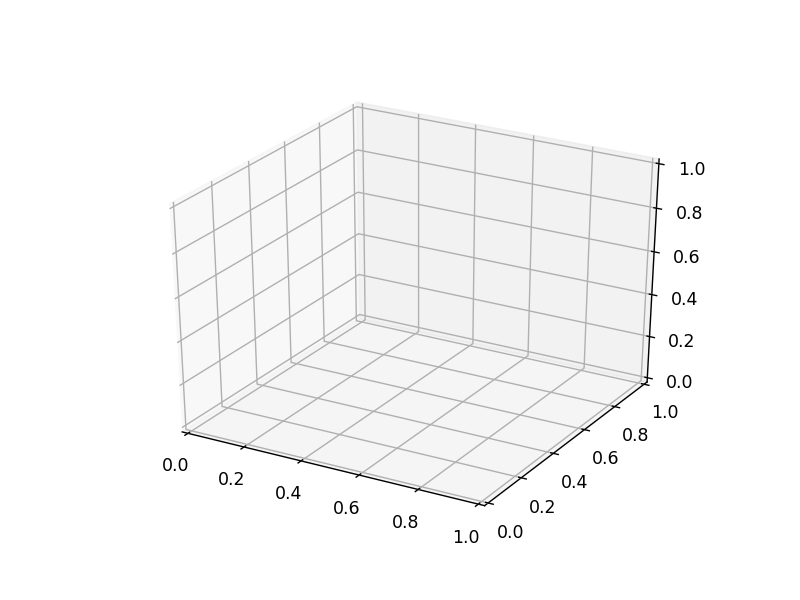

<IPython.core.display.Javascript object>


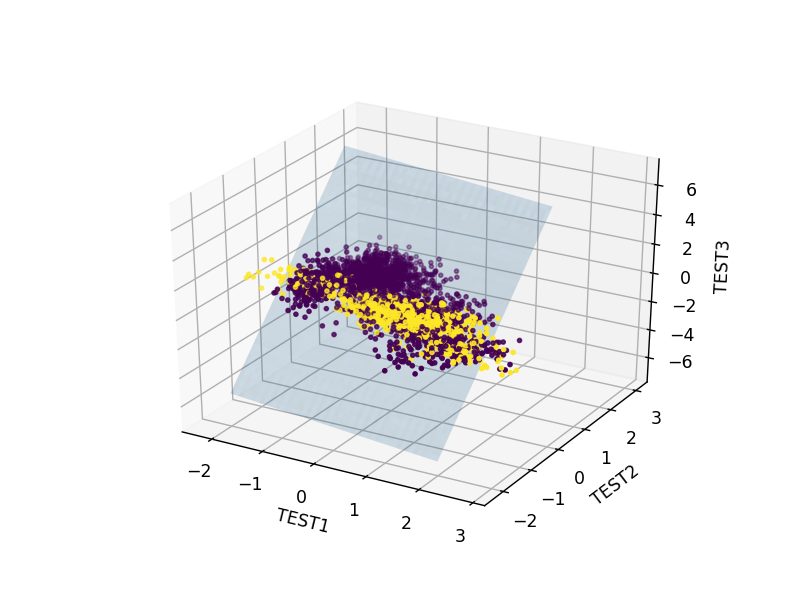

1


<IPython.core.display.Javascript object>


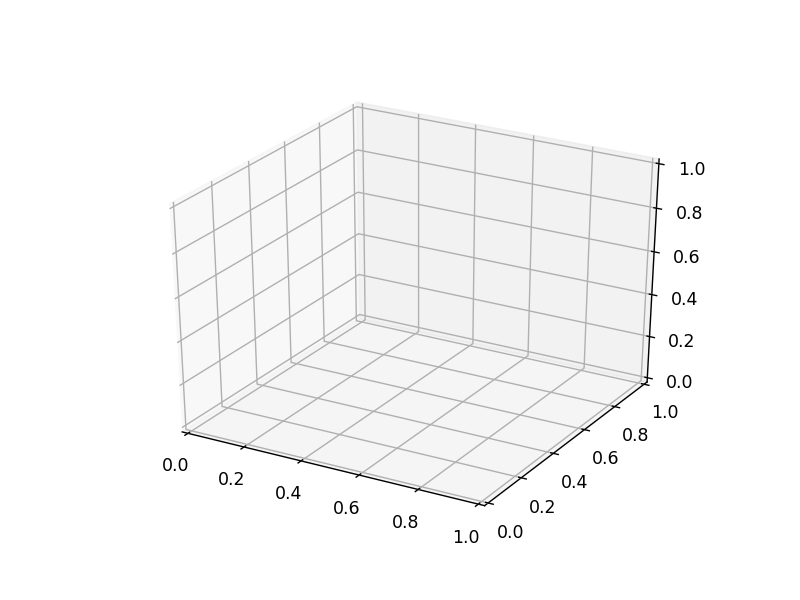

<IPython.core.display.Javascript object>


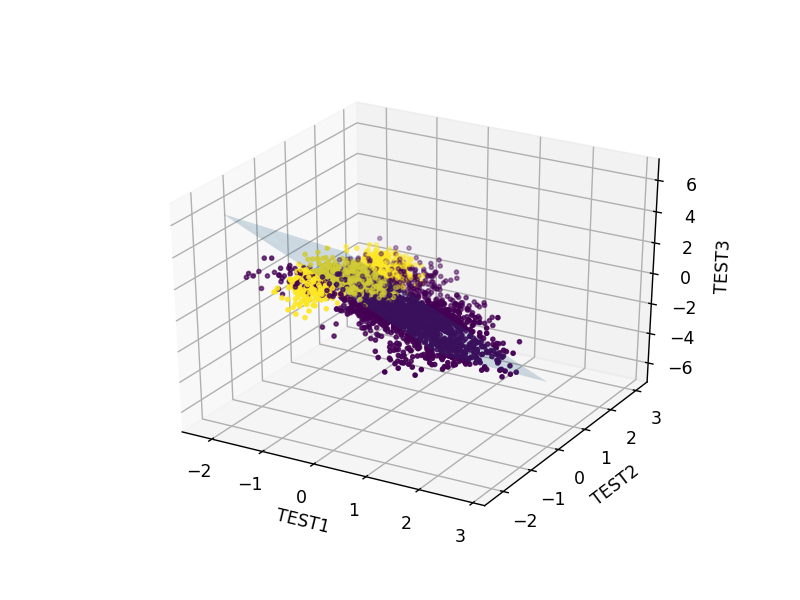

2


<IPython.core.display.Javascript object>


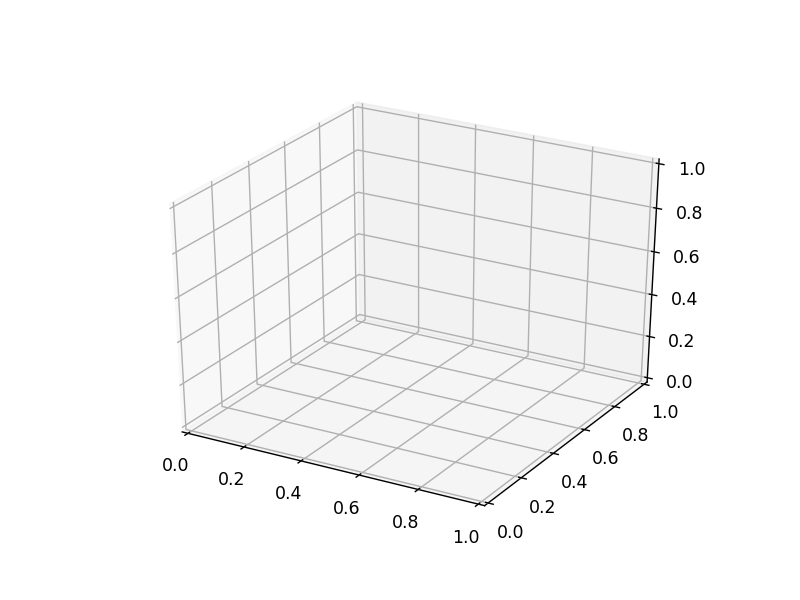

<IPython.core.display.Javascript object>


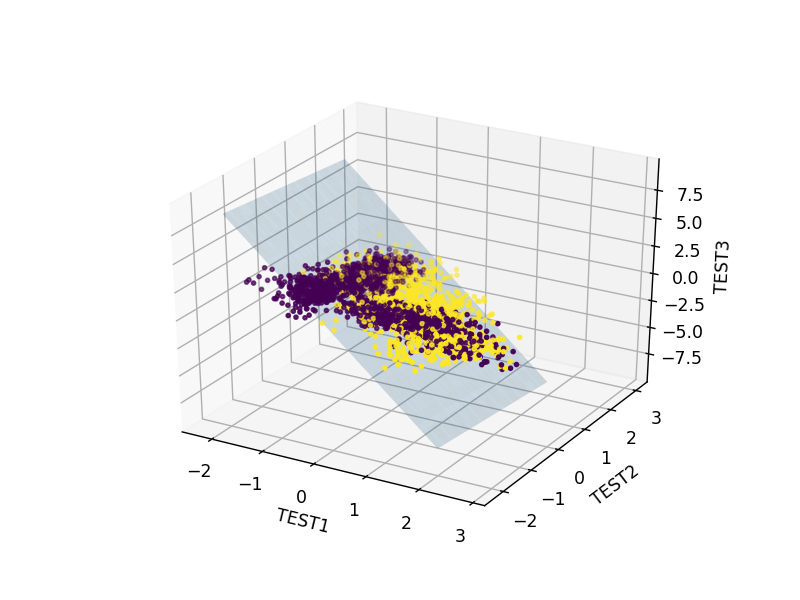

In [19]:
visualize_medical(3,x_train,y_,ws)

# Perceptron with Gradient Descent on Medical Dataset

In [122]:
ws = []
for i in range(3):
    val = perceptron_gd(x_train,y_,learning_rate = 0.1,my_label = i)
    ws.append(val[0])
    print("Class: ", i, end = ', ')
    print("Accuracy: ", val[1],end = ',')
    print("w: ", val[0])

Class:  0, Accuracy:  75.23333333333333,w:  [0.22315794 1.05893555 0.27479679]
Class:  1, Accuracy:  63.53333333333333,w:  [0.98686199 0.88811653 0.54952868]
Class:  2, Accuracy:  62.16666666666667,w:  [0.31584349 0.71934433 0.61804349]


# Visualizing the Learnt Planes

0


<IPython.core.display.Javascript object>


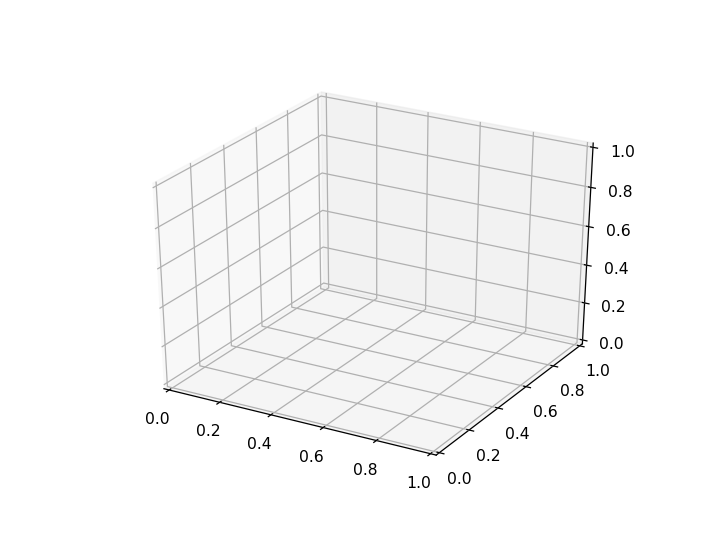

<IPython.core.display.Javascript object>


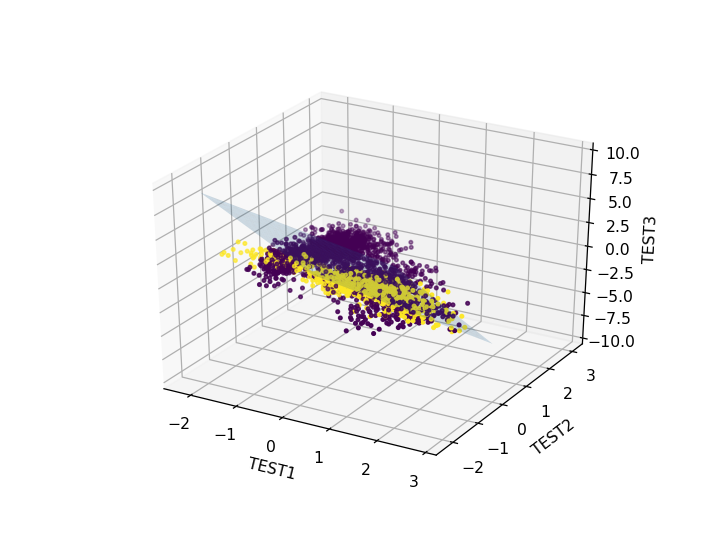

1


<IPython.core.display.Javascript object>


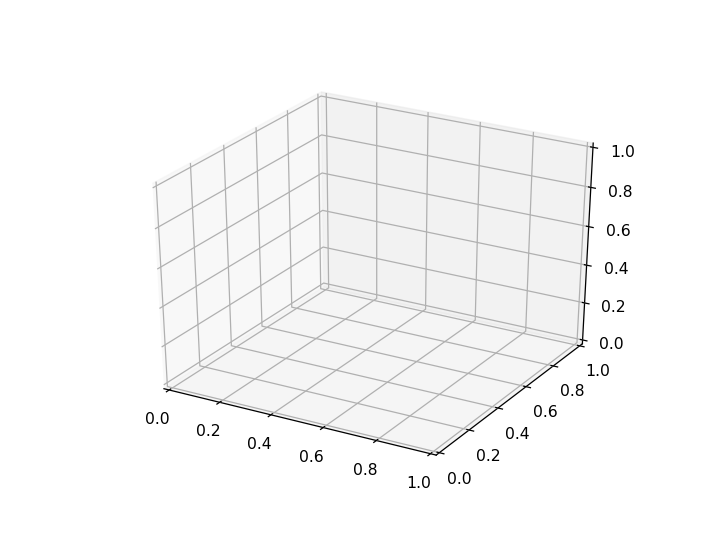

<IPython.core.display.Javascript object>


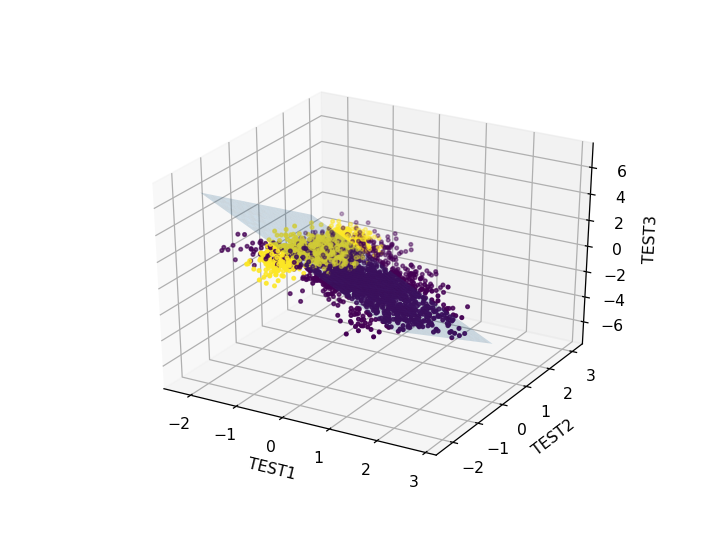

2


<IPython.core.display.Javascript object>


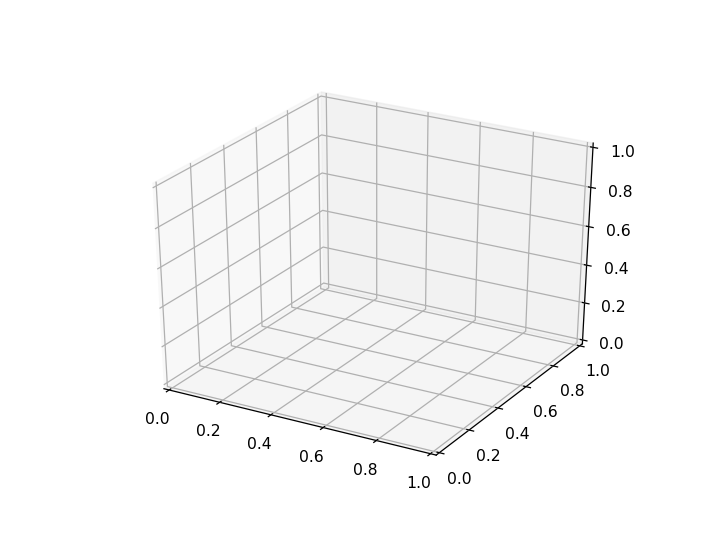

<IPython.core.display.Javascript object>


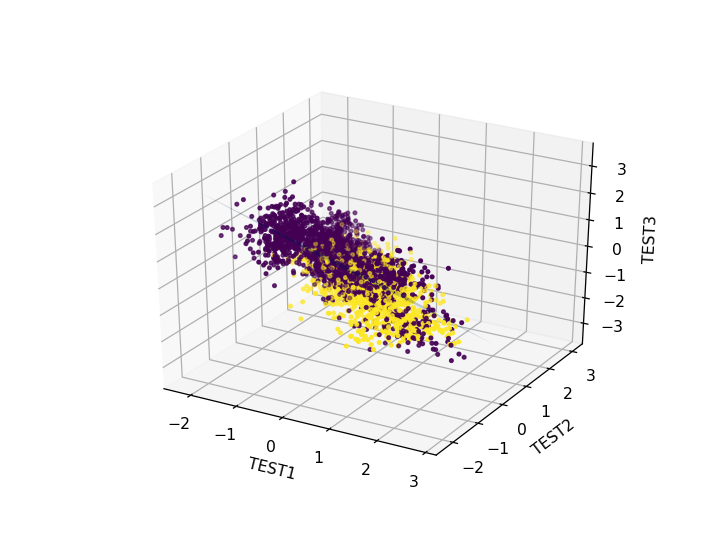

In [123]:
visualize_medical(3,x_train,y_,ws)

# Perceptron Iterative on Medical Dataset after PCA

In [20]:
x_train_pca,x_test, p = PCA(x_train,x_test,p=2)

In [21]:
ws = []
for i in range(3):
    val = perceptron_iterative(x_train_pca,y_,0,my_label = i)
    ws.append(val[0])
    print("Class: ", i, end = ', ')
    print("Accuracy: ", val[1],end = ',')
    print("w: ", val[0])

Initial Accuracy is :  24.666666666666668
Class:  0, Accuracy:  79.80000000000001,w:  [-1.97836708  0.12687634]
Initial Accuracy is :  31.233333333333334
Class:  1, Accuracy:  79.60000000000001,w:  [ 0.67839815 -3.11929637]
Initial Accuracy is :  72.86666666666667
Class:  2, Accuracy:  80.83333333333333,w:  [0.47039455 1.08961387]


# Perceptron on Medical Dataset after PCA-Visualization of Planes

<IPython.core.display.Javascript object>


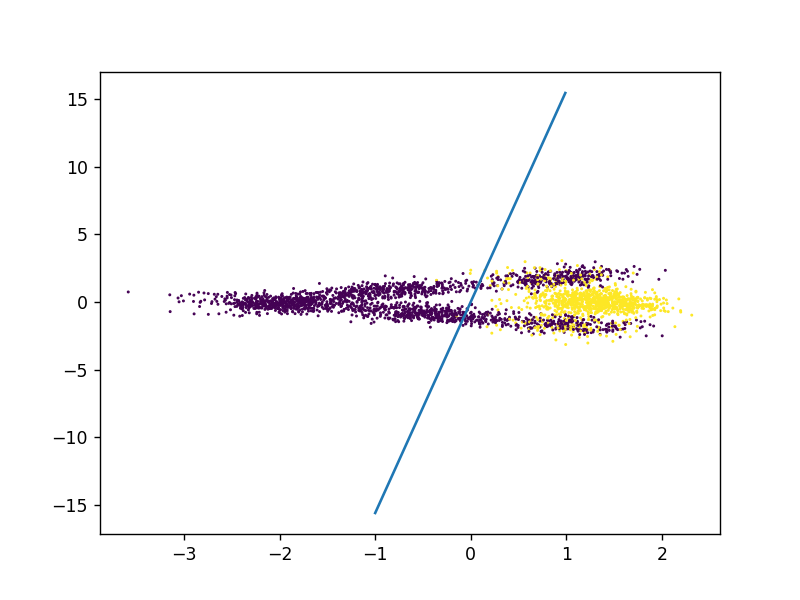

<IPython.core.display.Javascript object>


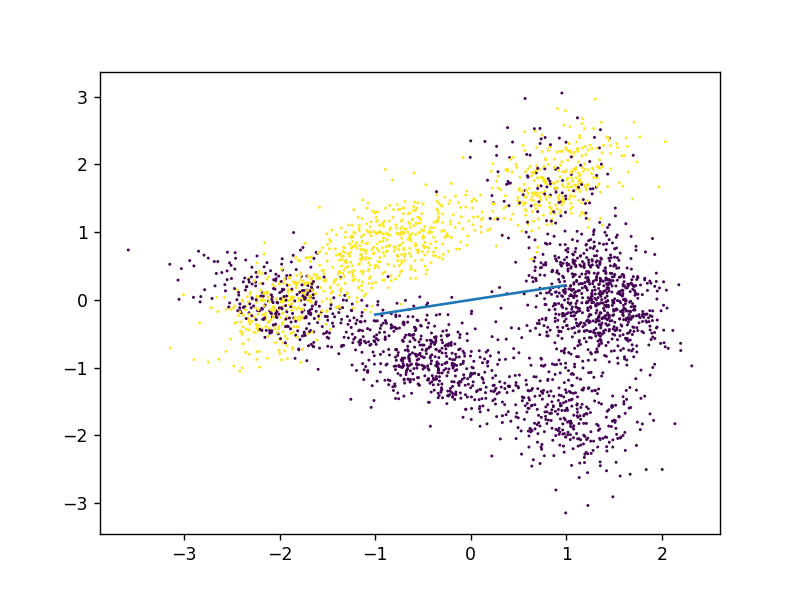

<IPython.core.display.Javascript object>


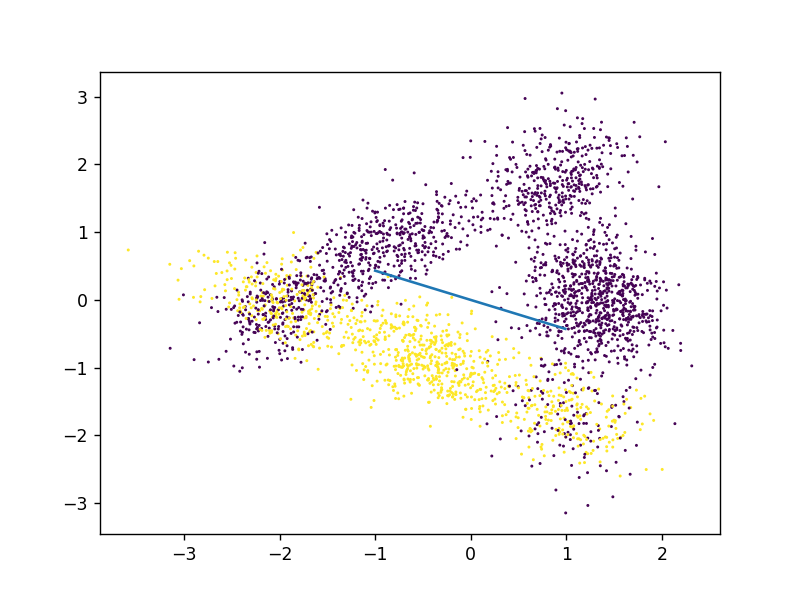

In [22]:
visualize_medical_2d(x_train_pca,y_,ws)

# Perceptron Gradient Descent on Medical Dataset after PCA

In [23]:
ws = []
for i in range(3):
    val = perceptron_gd(x_train_pca,y_train,learning_rate = 0.1,my_label = i)
    ws.append(val[0])
    print("Class: ", i, end = ', ')
    print("Accuracy: ", val[1],end = ',')
    print("w: ", val[0])

Class:  0, Accuracy:  47.233333333333334,w:  [0.54532158 0.73171143]
Class:  1, Accuracy:  47.0,w:  [0.17168174 0.5583027 ]
Class:  2, Accuracy:  47.733333333333334,w:  [0.4299403  0.77899618]


<IPython.core.display.Javascript object>


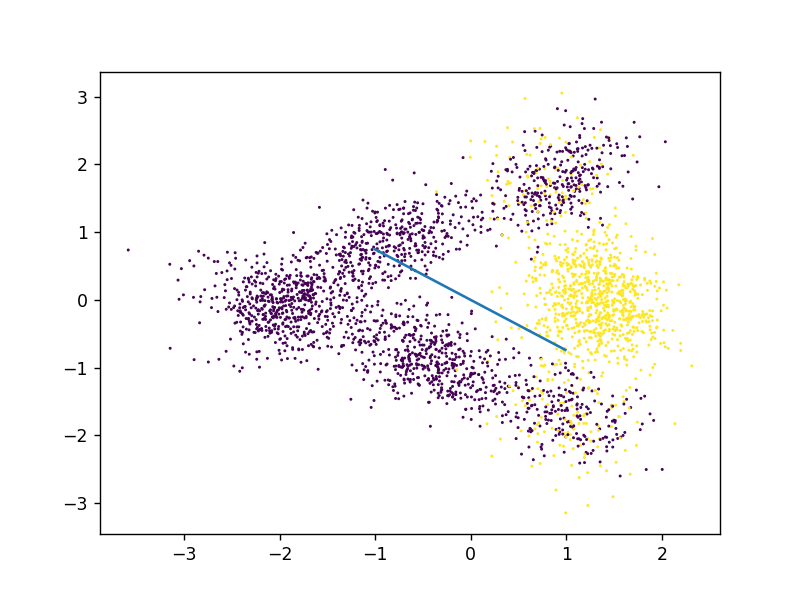

<IPython.core.display.Javascript object>


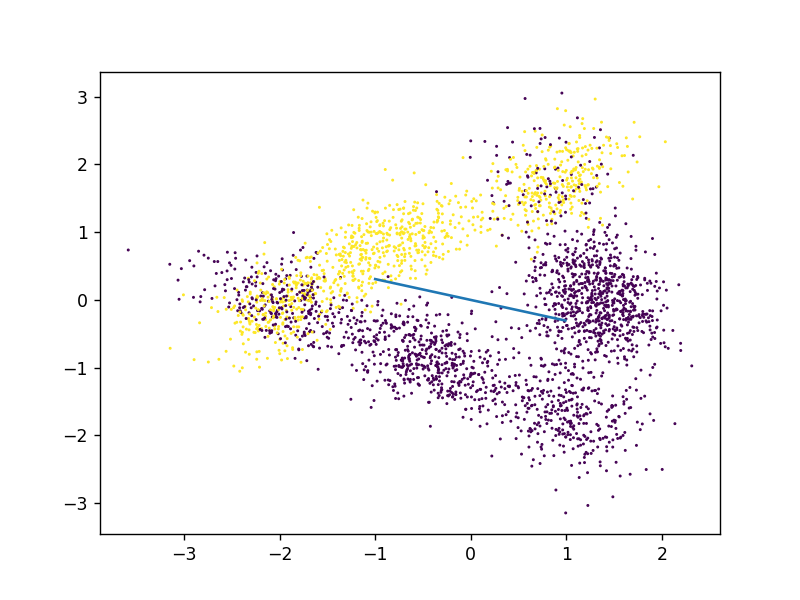

<IPython.core.display.Javascript object>


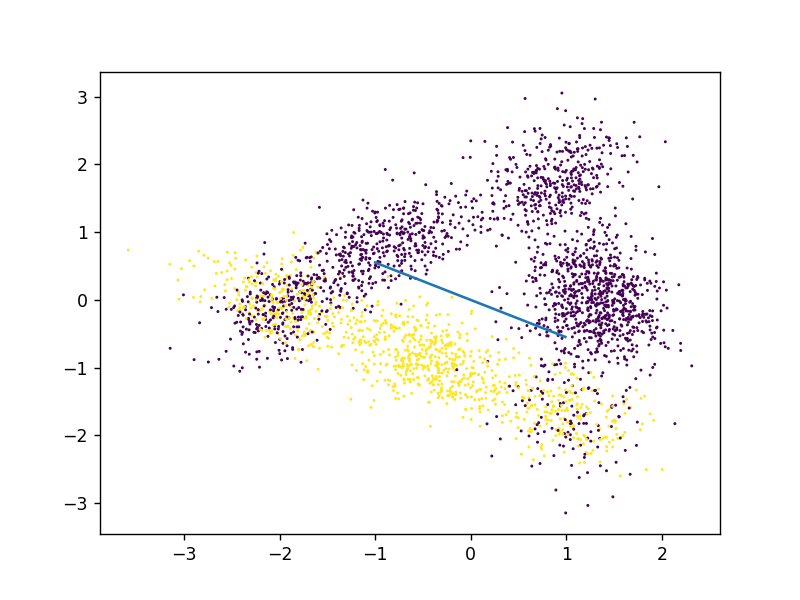

In [24]:
visualize_medical_2d(x_train_pca,y_,ws)

# FLDA

In [25]:
def flda(x,y,my_class):

    x_zero = x[np.where(y==my_class)]
    x_one = x[np.where(y!=my_class)]

    mu_zero = x_zero.mean(axis = 0)
    sigma_zero = np.sqrt(x_zero.var(axis = 0))
    x_zero = (x_zero - sigma_zero)/mu_zero

    mu_one = x_zero.mean(axis = 0)
    sigma_one = np.sqrt(x_one.var(axis = 0))
    x_one = (x_one - sigma_one)/mu_one

    sigma_w = np.dot(np.transpose(x_zero),x_zero) + np.dot(np.transpose(x_one),x_one)

    diff = mu_one - mu_zero
    diff = diff.reshape(diff.shape[0],1)
    sigma_b = np.multiply(diff,np.transpose(diff))
    
    w = np.random.rand(x.shape[1])
    w_flda = np.dot(np.linalg.inv(sigma_w),diff)
    
    acc = accuracy(x,y,w_flda,my_class)
    print("Accuracy is : ", acc)
    #print(sigma_w)
    return w_flda

# FLDA on Medical Test

In [26]:
x = x_train
y = y_

In [27]:
ws = []
for i in range(3):
    ws.append(flda(x,y,my_class = i))
print(ws)

Accuracy is :  77.56666666666666
Accuracy is :  81.66666666666667
Accuracy is :  80.76666666666667
[array([[5.77393000e-06],
       [6.37933620e-04],
       [5.13659029e-06]]), array([[ 5.96253907e-04],
       [-9.37463700e-05],
       [-5.24321541e-05]]), array([[-4.51743590e-05],
       [-8.88498055e-05],
       [ 5.67582534e-04]])]


0


<IPython.core.display.Javascript object>


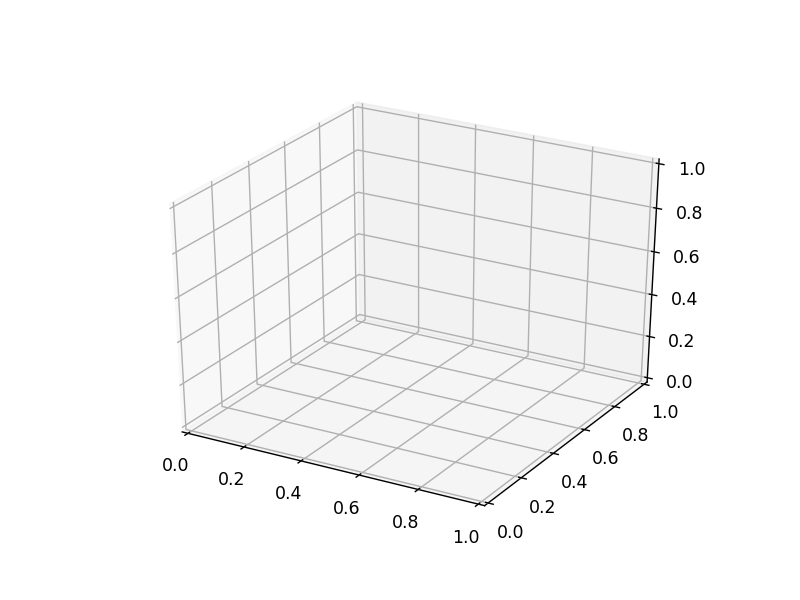

<IPython.core.display.Javascript object>


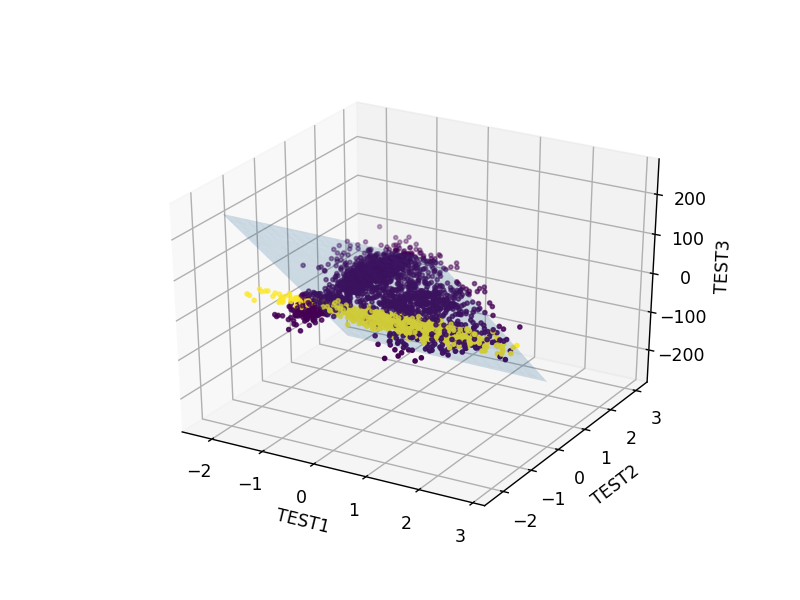

1


<IPython.core.display.Javascript object>


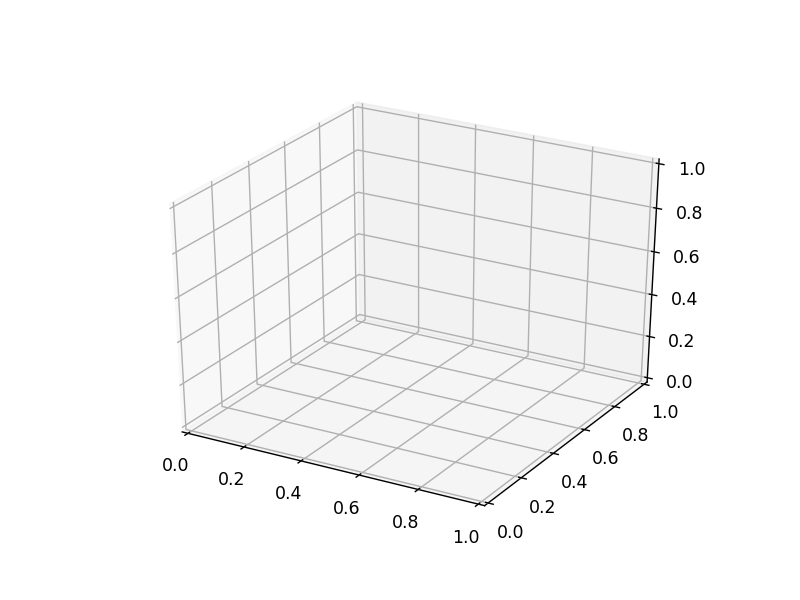

<IPython.core.display.Javascript object>


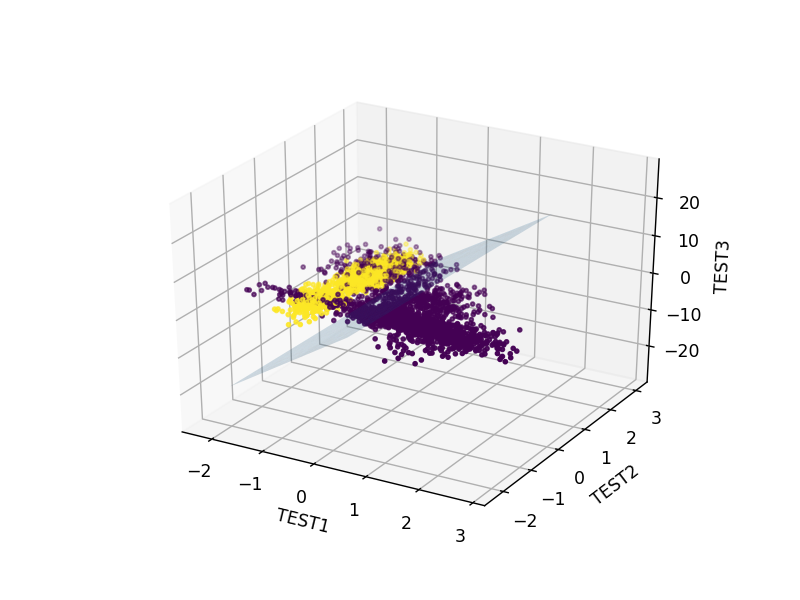

2


<IPython.core.display.Javascript object>


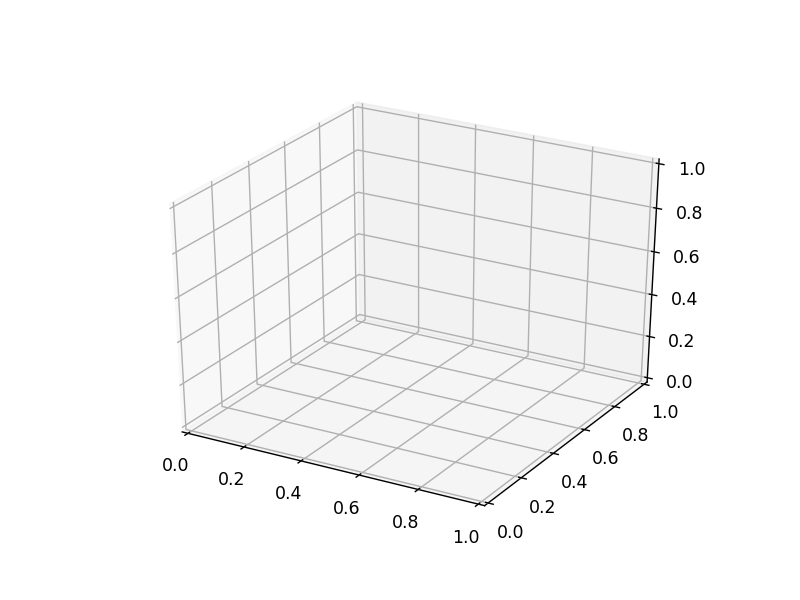

<IPython.core.display.Javascript object>


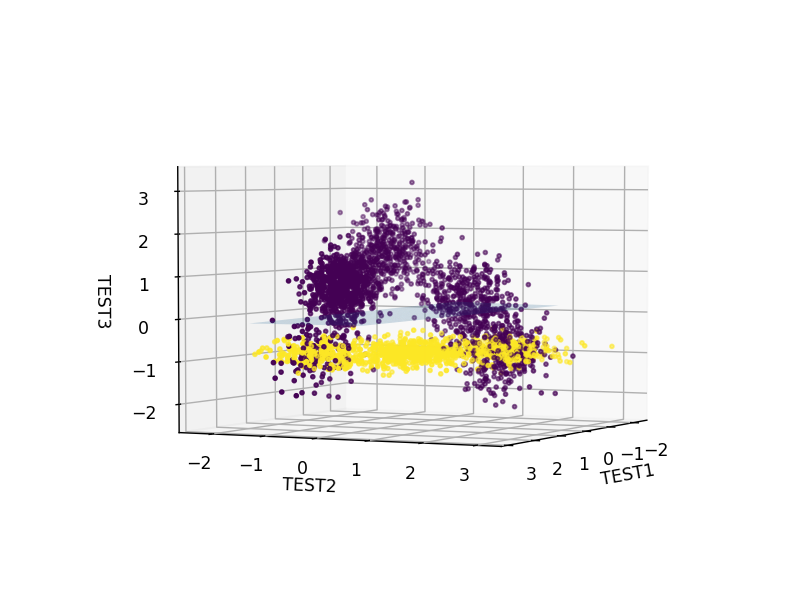

In [28]:
visualize_medical(3,x,y,ws)